In [1]:
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()
print(X_train.shape,Y_train.shape)
import numpy as np
np.unique(Y_train)

(60000, 28, 28) (60000,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

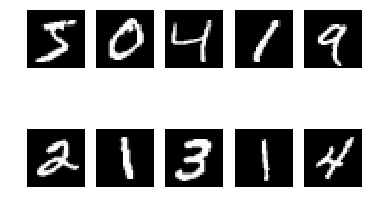

In [3]:
#显示实例图像
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i,:,:],cmap='gray')
    plt.axis('off')

In [4]:
img_rows,img_cols=28,28
X_train=X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test=X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape=(img_rows,img_cols,1)
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

In [5]:
#one_hot_encoding
from keras.utils import np_utils
n_classes=10
y_train=np_utils.to_categorical(Y_train,n_classes)
y_test=np_utils.to_categorical(Y_test,n_classes)

In [14]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import MaxPool2D,Dropout,Flatten
model=Sequential()
model.add(Dense(32,input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(n_classes,activation='softmax'))

In [18]:
from keras.optimizers import SGD
sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1)

Epoch 1/20
60000/60000 [==============================] - 54s 907us/step - loss: 0.2973 - acc: 0.9145
Epoch 2/20
60000/60000 [==============================] - 54s 899us/step - loss: 0.2790 - acc: 0.9214
Epoch 3/20
60000/60000 [==============================] - 54s 896us/step - loss: 0.2713 - acc: 0.9239
Epoch 4/20
60000/60000 [==============================] - 55s 909us/step - loss: 0.2636 - acc: 0.9264
Epoch 5/20
60000/60000 [==============================] - 55s 914us/step - loss: 0.2548 - acc: 0.9282
Epoch 6/20
60000/60000 [==============================] - 56s 940us/step - loss: 0.2472 - acc: 0.9310
Epoch 7/20
60000/60000 [==============================] - 55s 910us/step - loss: 0.2370 - acc: 0.9334
Epoch 8/20
60000/60000 [==============================] - 55s 911us/step - loss: 0.2262 - acc: 0.9371
Epoch 9/20
60000/60000 [==============================] - 56s 937us/step - loss: 0.2189 - acc: 0.9385
Epoch 10/20
60000/60000 [==============================] - 56s 937us/step - loss: 

In [20]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 347us/step


[0.25720041396543386, 0.9332]

In [21]:
from keras.models import load_model
model.save('MLP_handwriteDigitsClassify.h5') #创建HDF5文件
del model #删除现有模型

In [22]:
model_load=load_model('MLP_handwriteDigitsClassify.h5')

In [23]:
model_load.evaluate(X_train,y_train)

60000/60000 [==============================] - 19s 323us/step


[0.15585209670960903, 0.9556166666666667]

In [24]:
model_load.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 324us/step


[0.25720041396543386, 0.9332]